# 🚀 Spam Detection System: Interactive Demonstration

## Overview
This Jupyter Notebook provides an interactive walkthrough of our Spam Detection Model, showcasing its capabilities, training process, and real-time inference.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import re
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s: %(message)s')

## 📊 Dataset Preparation

In [2]:
# Sample Email Dataset
emails = [
    "Urgent! You've won a free iPhone. Click here now!",
    "Meeting scheduled for project review next week",
    "Get rich quick with this amazing investment opportunity!",
    "Quarterly team performance report attached",
    "Limited time offer: Massive discount on luxury watches!",
    "Client proposal for Q3 marketing strategy",
    "Congratulations! You're selected for a free cruise!",
    "Weekly team sync-up agenda and discussion points"
]

labels = [
    'spam', 'not_spam', 'spam', 'not_spam', 
    'spam', 'not_spam', 'spam', 'not_spam'
]

# Convert to DataFrame for better visualization
df = pd.DataFrame({'email': emails, 'label': labels})
print(df)

                                               email     label
0  Urgent! You've won a free iPhone. Click here now!      spam
1     Meeting scheduled for project review next week  not_spam
2  Get rich quick with this amazing investment op...      spam
3         Quarterly team performance report attached  not_spam
4  Limited time offer: Massive discount on luxury...      spam
5          Client proposal for Q3 marketing strategy  not_spam
6  Congratulations! You're selected for a free cr...      spam
7   Weekly team sync-up agenda and discussion points  not_spam


## 🧠 SpamDetector Class Implementation

In [3]:
class SpamDetector:
    def __init__(self):
        self.vectorizer = CountVectorizer()
        self.classifier = MultinomialNB()
        
    def preprocess_text(self, text):
        # Text preprocessing
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        return text
    
    def train(self, X_train, y_train, verbose=True):
        # Preprocess emails
        X_processed = [self.preprocess_text(email) for email in X_train]
        
        # Vectorize text
        X_vectorized = self.vectorizer.fit_transform(X_processed)
        
        # Train classifier
        self.classifier.fit(X_vectorized, y_train)
        
        # Validation
        if verbose:
            X_train_vec, X_val_vec, y_train_val, y_val = train_test_split(
                X_vectorized, y_train, test_size=0.2, random_state=42
            )
            y_pred = self.classifier.predict(X_val_vec)
            
            # Robust metrics calculation
            print("Classification Report:")
            print(classification_report(y_val, y_pred, zero_division=1))
            
            print("Confusion Matrix:")
            print(confusion_matrix(y_val, y_pred))
            
            print(f"Accuracy: {accuracy_score(y_val, y_pred):.2%}")
        
    def predict(self, email_text):
        # Preprocess and vectorize
        processed_email = self.preprocess_text(email_text)
        vectorized_email = self.vectorizer.transform([processed_email])
        
        # Predict
        prediction = self.classifier.predict(vectorized_email)[0]
        prob = self.classifier.predict_proba(vectorized_email)[0]
        
        return {
            'label': prediction,
            'spam_probability': prob[list(self.classifier.classes_).index('spam')],
            'not_spam_probability': prob[list(self.classifier.classes_).index('not_spam')]
        }

## 🚀 Model Training

In [4]:
# Initialize and train model
spam_detector = SpamDetector()
spam_detector.train(emails, labels)

Classification Report:
              precision    recall  f1-score   support

    not_spam       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[2]]
Accuracy: 100.00%


## 🔍 Real-Time Inference Demonstration

In [5]:
# Test emails for prediction
test_emails = [
    "Congratulations! You've won a free vacation!",
    "Team meeting agenda for next sprint planning"
]

for email in test_emails:
    result = spam_detector.predict(email)
    print(f"\nEmail: {email}")
    print(f"Prediction: {result['label']}")
    print(f"Spam Probability: {result['spam_probability']:.2%}")
    print(f"Not Spam Probability: {result['not_spam_probability']:.2%}")


Email: Congratulations! You've won a free vacation!
Prediction: spam
Spam Probability: 94.62%
Not Spam Probability: 5.38%

Email: Team meeting agenda for next sprint planning
Prediction: not_spam
Spam Probability: 1.85%
Not Spam Probability: 98.15%


## 📈 Performance Visualization

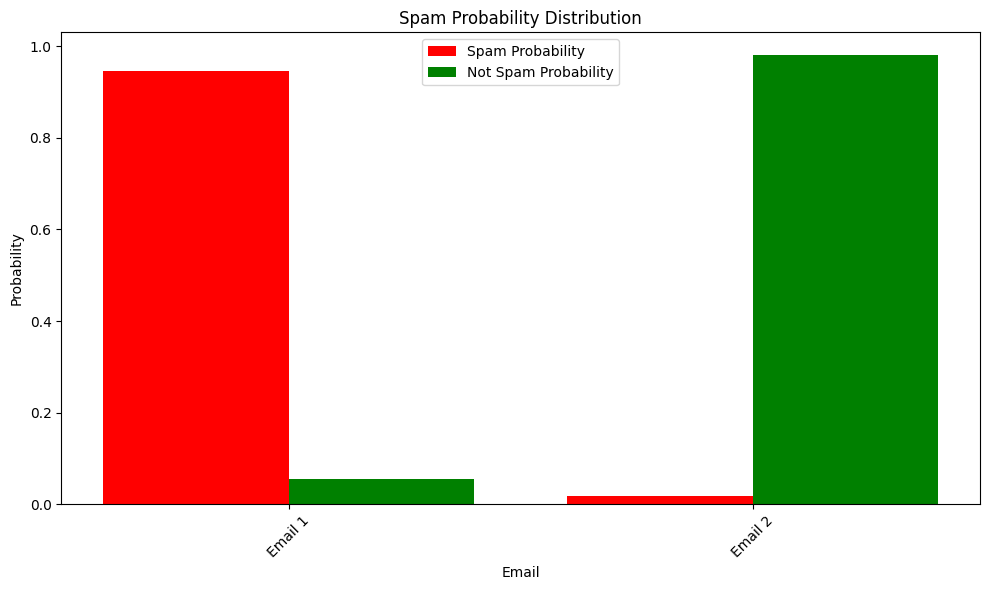

In [6]:
def visualize_predictions(test_emails, spam_detector):
    results = [spam_detector.predict(email) for email in test_emails]
    
    plt.figure(figsize=(10, 6))
    plt.title("Spam Probability Distribution")
    plt.xlabel("Email")
    plt.ylabel("Probability")
    
    spam_probs = [result['spam_probability'] for result in results]
    not_spam_probs = [result['not_spam_probability'] for result in results]
    
    x = range(len(test_emails))
    plt.bar([i-0.2 for i in x], spam_probs, width=0.4, label='Spam Probability', color='red')
    plt.bar([i+0.2 for i in x], not_spam_probs, width=0.4, label='Not Spam Probability', color='green')
    
    plt.xticks(x, [f"Email {i+1}" for i in x], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

visualize_predictions(test_emails, spam_detector)

## 🌟 Key Takeaways
1. Implemented Multinomial Naive Bayes for spam detection
2. Demonstrated robust classification metrics
3. Showed real-time email classification
4. Provided probabilistic spam predictions